In [ ]:
# News API Sentiment Analysis
# Find highest mean positive score, highest negative score and highest positive score

In [144]:
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [145]:
# Read your api key environment variable
#load_dotenv()
# api_key = os.getenv("NEWS_API_KEY")

In [146]:
# from newsapi.newsapi_client import NewsApiClient
from newsapi import NewsApiClient

In [147]:
newsapi=NewsApiClient(api_key="a7f8606fc0a549b6b4aee52715d82cf5")

In [148]:
# Fetch Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")
btc_headlines["totalResults"]

7147

In [149]:
# Fetch Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum",language="en",sort_by="relevancy")
eth_headlines["totalResults"]

2179

In [150]:
# Create Bitcoin sentiment scores DataFrame
btc_sentiment=[]




for article in btc_headlines["articles"]:
    try:
        text=article["content"]
        results=analyzer.polarity_scores(text)
        compound=results["compound"]
        pos=results["pos"]
        neu=results["neu"]
        neg=results["neg"]

        btc_sentiment.append({"text":text,"Compound":compound,"Positive":pos,"Negative":neg,"Neutral":neu})
    except AttributeError:
        pass
    

btc=pd.DataFrame(btc_sentiment)
btc

,text,Compound,Positive,Negative,Neutral
0,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
1,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
2,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
3,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
4,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
5,,0.0000,0.000,0.000,0.000
6,Data centers and bitcoin mining operations are...,0.7717,0.240,0.051,0.709
7,A proposed law in India would make it a crime ...,-0.2500,0.068,0.095,0.838
8,By Reuters Staff\r\nFILE PHOTO: A collection o...,0.0000,0.000,0.000,1.000
9,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000


In [151]:
# Create ethereum sentiment scores DataFrame
eth_sentiment=[]



for article in eth_headlines["articles"]:
    try:
        text=article["content"]
        results=analyzer.polarity_scores(text)
        compound=results["compound"]
        pos=results["pos"]
        neu=results["neu"]
        neg=results["neg"]

        eth_sentiment.append({"text":text,"Compound":compound,"Positive":pos,"Negative":neg,"Neutral":neu})
    except AttributeError:
        pass
    
    
    
eth=pd.DataFrame(eth_sentiment)
eth

,text,Compound,Positive,Negative,Neutral
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
2,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916
5,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
6,"MetaMask, one of the most popular web wallets ...",0.4754,0.083,0.000,0.917
7,A security breach at cryptocurrency platform R...,0.0258,0.112,0.083,0.805
8,"March\r\n26, 2021\r\n1 min read\r\nThis articl...",-0.3400,0.000,0.068,0.932
9,Cryptocurrency exchange company Bitfinex is la...,0.2960,0.090,0.048,0.862


In [152]:
# Describe Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.123730,0.055100,0.023150,0.871800
std,0.376032,0.079399,0.044365,0.223146
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.853000
50%,0.000000,0.000000,0.000000,0.933500
75%,0.323650,0.068500,0.012750,1.000000
max,0.771700,0.240000,0.142000,1.000000


In [153]:
# Describe Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.072075,0.051750,0.034550,0.913750
std,0.368366,0.059894,0.047204,0.071861
min,-0.557400,0.000000,0.000000,0.763000
25%,-0.177325,0.000000,0.000000,0.883000
50%,0.000000,0.063500,0.000000,0.921000
75%,0.401900,0.080750,0.071000,0.954250
max,0.827100,0.237000,0.145000,1.000000


---

In [154]:
# Tokenize the texts

In [155]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import re




In [156]:
lemma=WordNetLemmatizer() 
stop=stopwords.words('english')

In [157]:
def tokenizer(text):
    words=word_tokenize(text)
    words=list(filter(lambda w: w.lower(), words))
    words=list(filter(lambda t: t not in punctuation, words))
    words=list(filter(lambda t: t.lower() not in stop, words))
    tokens=[lemma.lemmatize(word) for word in words]
    return tokens





In [158]:
btc["tokens"]=btc.text.apply(tokenizer)
btc

,text,Compound,Positive,Negative,Neutral,tokens
0,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873,"[promised, earlier, year, Tesla, accepts, paym..."
1,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935,"[inevitable, happened, purchase, Tesla, vehicl..."
2,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950,"[Tesla, made, headline, earlier, year, took, s..."
3,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwide, Photo, ..."
4,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"[hacker, behind, last, year, big, Twitter, hac..."
5,,0.0000,0.000,0.000,0.000,[]
6,Data centers and bitcoin mining operations are...,0.7717,0.240,0.051,0.709,"[Data, center, bitcoin, mining, operation, bec..."
7,A proposed law in India would make it a crime ...,-0.2500,0.068,0.095,0.838,"[proposed, law, India, would, make, crime, min..."
8,By Reuters Staff\r\nFILE PHOTO: A collection o...,0.0000,0.000,0.000,1.000,"[Reuters, Staff, FILE, PHOTO, collection, bitc..."
9,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[Reuters, Staff, FILE, PHOTO, Representations,..."


In [159]:
eth["tokens"]=eth.text.apply(tokenizer)
eth

,text,Compound,Positive,Negative,Neutral,tokens
0,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"[One, strictest, crackdown, worldwide, Photo, ..."
1,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"[Famed, auction, house, Christies, sold, first..."
2,"Move fast, break things, get hacked.\r\nThat’s...",-0.4019,0.000,0.080,0.920,"[Move, fast, break, thing, get, hacked, ’, hap..."
3,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"['s, everything, need, know, non-fungible, tok..."
4,OpenSea has been one of a handful of NFT marke...,0.4767,0.084,0.000,0.916,"[OpenSea, one, handful, NFT, marketplace, expl..."
5,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[NFTs, latest, cryptocurrency, rage, day, band..."
6,"MetaMask, one of the most popular web wallets ...",0.4754,0.083,0.000,0.917,"[MetaMask, one, popular, web, wallet, cryptocu..."
7,A security breach at cryptocurrency platform R...,0.0258,0.112,0.083,0.805,"[security, breach, cryptocurrency, platform, R..."
8,"March\r\n26, 2021\r\n1 min read\r\nThis articl...",-0.3400,0.000,0.068,0.932,"[March, 26, 2021, 1, min, read, article, trans..."
9,Cryptocurrency exchange company Bitfinex is la...,0.2960,0.090,0.048,0.862,"[Cryptocurrency, exchange, company, Bitfinex, ..."


---

In [ ]:
# NGrams and Frequency Analysis
# Use NLTK to produce the n-grams for N=2
# List the top 10 words for each coin

In [160]:
from collections import Counter
from nltk import ngrams

In [161]:
N=2



grams=ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 8),
 (('Reuters', 'Staff'), 8),
 (('Staff', 'FILE'), 7),
 (('FILE', 'PHOTO'), 7),
 (('virtual', 'currency'), 7),
 (('illustration', 'taken'), 7),
 (('picture', 'illustration'), 5),
 (('PHOTO', 'collection'), 4),
 (('collection', 'bitcoin'), 4),
 (('bitcoin', 'virtual'), 4),
 (('currency', 'token'), 4),
 (('token', 'displayed'), 4),
 (('displayed', 'picture'), 4),
 (('taken', 'Dec.'), 4),
 (('Dec.', '8'), 4),
 (('8', '2017'), 4),
 (('2017', 'REUTERS/Benoit'), 4),
 (('REUTERS/Benoit', 'Tessier/Illustration'), 3),
 (('Tessier/Illustration', 'Reuters'), 3),
 (('currency', 'Bitcoin'), 3)]

In [162]:
N=2
grams=ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Reuters'), 5),
 (('Reuters', 'Staff'), 5),
 (('Staff', 'FILE'), 4),
 (('FILE', 'PHOTO'), 4),
 (('virtual', 'currency'), 3),
 (('picture', 'illustration'), 3),
 (('illustration', 'taken'), 3),
 (('non-fungible', 'token'), 2),
 (('latest', 'cryptocurrency'), 2),
 (('char', 'NFTs'), 2),
 (('Kings', 'Leon'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('PHOTO', 'collection'), 2),
 (('collection', 'bitcoin'), 2),
 (('bitcoin', 'virtual'), 2),
 (('currency', 'token'), 2),
 (('token', 'displayed'), 2),
 (('displayed', 'picture'), 2),
 (('taken', 'Dec.'), 2),
 (('Dec.', '8'), 2)]

In [163]:
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

In [164]:
# Top 10 BTC tokens/words
btc_tokens=tokenizer(btc.text.str.cat())
token_count(btc_tokens, 10)

[('char', 19),
 ('Reuters', 15),
 ('Bitcoin', 9),
 ('bitcoin', 9),
 ('Staff', 8),
 ('Tesla', 7),
 ('FILE', 7),
 ('PHOTO', 7),
 ('virtual', 7),
 ('currency', 7)]

In [165]:
# Top 10 ETH tokens/words
eth_tokens = tokenizer(eth.text.str.cat())
token_count(eth_tokens, 10)

[('char', 19),
 ('Reuters', 11),
 ('new', 7),
 ('cryptocurrency', 6),
 ('million', 5),
 ('currency', 5),
 ('Staff', 5),
 ("'s", 4),
 ('token', 4),
 ('NFTs', 4)]

In [ ]:
# Generate Word Clouds

In [166]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mplib






In [167]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=300).generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

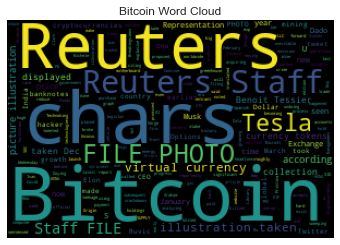

In [168]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

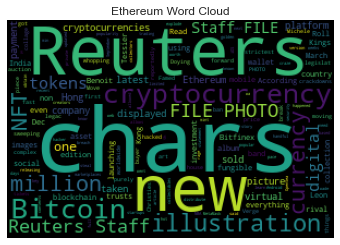

In [169]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

In [170]:
# Build Named Entity Recognition
# Visualize tags using SpaCy

In [171]:
import spacy
from spacy import displacy

In [172]:
# Load the spaCy model
nlp=spacy.load('en_core_web_sm')

In [173]:
# Concatenate all of the bitcoin text together
all_btc_text=btc.text.str.cat()
all_btc_text

'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars]Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker

In [177]:
# Bitcoin NER

In [178]:
doc=nlp(all_btc_text)

In [179]:
displacy.render(doc, style='ent')

In [180]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

earlier this year DATE
Tesla ORDINAL
Bitcoin GPE
Tesla ORG
Elon Musk ORG
Musk ORG
Bitcoin GPE
Tesla ORDINAL
Tesla ORDINAL
Bitcoin GPE
Tesla ORDINAL
Technoking Elon Musk ORG
Wednesday DATE
Tesla WORK_OF_ART
earlier this year DATE
bitcoin GPE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter ORG
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
January 21, 2021 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
the Covid-19 era DATE
23, DATE
2021 DATE
3 min QUANTITY
Spanish NORP
AI GPE
Bitcoin GPE
Bitcoin ETF GPE
the United States GPE
FD Funds Management LLC ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
One Dollar PERCENT
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin GPE
U.S. GPE
January 27, 2020 DATE
REUTERS/ ORG
Reu PERSON
KT

---

In [181]:
# Ethereum NER

In [182]:
# Concatenate all of the ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new star

In [183]:
eth_doc=nlp(all_eth_text)

In [184]:
displacy.render(eth_doc, style='ent')

In [186]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

One CARDINAL
Michele Doying PERSON
India GPE
Reuters ORG
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Roll ORG
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
Leon PERSON
NBA ORG
millions CARDINAL
Android PERSON
September 2020 DATE
about $5.7 million MONEY
26, 2021 DATE
1 min QUANTITY
Spanish NORP
AI GPE
New York Times ORG
Bitfinex ORG
Bitfinex Pay PERSON
millions of dollars MONEY
Reuters ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
India GPE
Reuters ORG
Reuters ORG
Reuters ORG
Elrond ORDINAL
Bitcoin GPE
this month DATE
Kings PERSON
more than $2 million MONEY
Grayscale Investments ORG
Wednesday DATE
five CARDINAL
13 CARDINAL
Reuters ORG
Bitcoin GPE
April 24, 2020 DATE
REUTERS/ ORG
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Bitcoin GPE
Two CARDINAL
german NORP
PC Watch ORG
Reuters ORG
Dec. 8, 2017 DATE
REUTERS/Benoit Tessier/Illustration ORG
Reuters ORG
Bitcoin GPE
